Шишка Антон (Варіант 30)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [ ]:
from google.colab import files
my_file = files.upload()

df = pd.read_csv('shopping_trends.csv', encoding='ISO-8859-1')

Saving shopping_trends.csv to shopping_trends (1).csv


Перевірте розмір таблиці, наявність пропусків, тип стовпців.  

In [ ]:
print("Розмір таблиці:", df.shape)
print("Пропуски у даних:\n", df.isnull().sum())
print("Типи стовпців:\n", df.dtypes)

Розмір таблиці: (3900, 19)
Пропуски у даних:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Типи стовпців:
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       ob

Далі рекомендовано використовувати наступні стовпці (з огляду на тип даних) "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases".  

In [ ]:
selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
new_data = df[selected_columns]

Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці. Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).

In [8]:
new_data.columns = [column.lower().replace(' ', '_') for column in new_data.columns]

Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

Використайте метод ліктя, щоб визначити оптимальну кількість кластерів.

In [10]:
cost = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    cost.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", де спостерігається різке зменшення вартості кластерів.

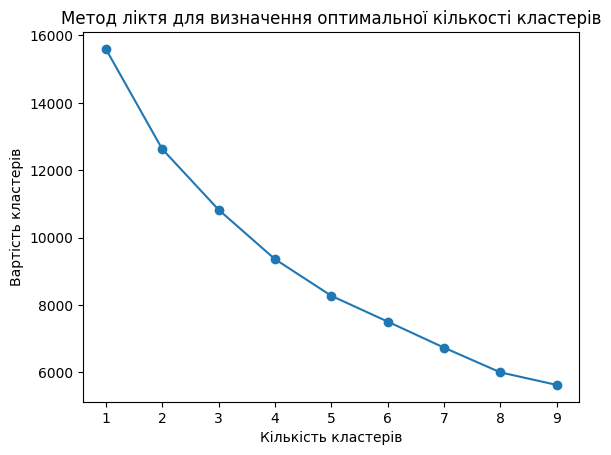

In [11]:
plt.plot(range(1, 10), cost, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

Кластеризація за допомогою K-means:

Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means.

Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера.

In [12]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

new_data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-ec887252cc1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Cluster'] = kmeans.labels_


Візуалізація результатів

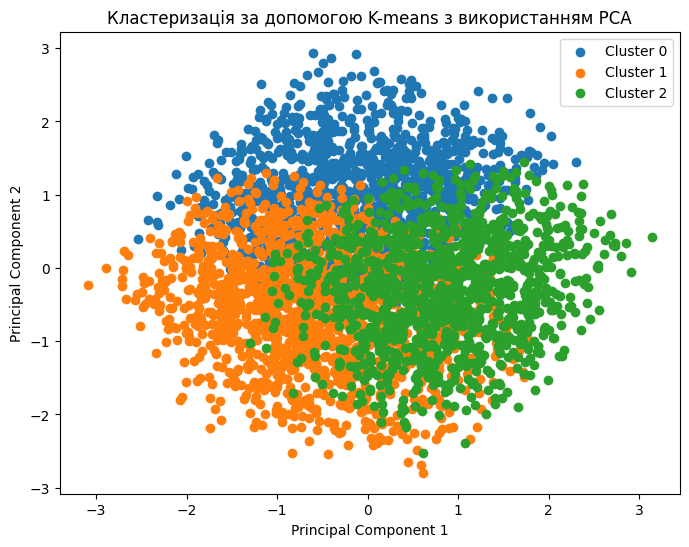

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Кластеризація за допомогою K-means з використанням PCA')
plt.legend()
plt.show()

**Висновок**

Після проведення аналізу шопінгових тенденцій клієнтів за допомогою методу K-means було виділено оптимальну кількість кластерів, що дорівнює трьом. Використовуючи дані про вік, суми покупок, рейтинг відгуків та попередні покупки, були створені кластери, які можуть бути корисними для подальшого розуміння споживацьких звичок та розробки персоналізованих стратегій маркетингу для різних сегментів клієнтів.